

## ***STOCHASTIC GRADIENT DESCENT***

---







In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

## Read the data set

In [43]:
data = pd.read_csv('Ph.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


## <b> Analysing the Data Set</b>

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [45]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


In [46]:
data.corr()

,X,Y
X,1.000000,-0.339511
Y,-0.339511,1.000000


### missing values

In [47]:
data.isnull().sum()

X    0
Y    0
dtype: int64

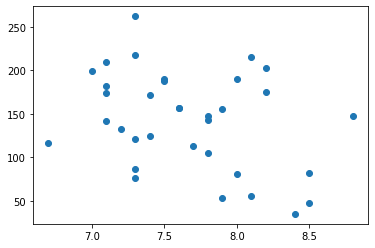

In [48]:
plt.scatter(data['X'],data['Y'])

## Outliners 

In [49]:
from scipy import stats

z = np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


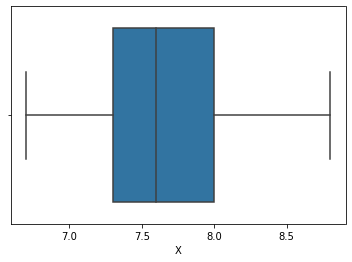

In [50]:
sns.boxplot(x=data['X'])


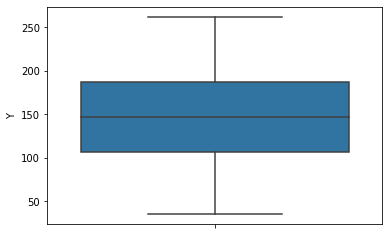

In [51]:
sns.boxplot(y=data['Y'])

In [52]:
filter = data[(z < 3).all(axis=1)]
filter.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [53]:
print(len(data))
print(len(filter))

34
34


**Observation:** From above analysis, we can conclude that there are no outliners which effect our models and prediction

## Normalisation Of Data

In [54]:
norm_data = data.copy()

In [55]:
norm_data = (norm_data - norm_data.min())/(norm_data.max() - norm_data.min())
norm_data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


## Splitting of Data into Training and Testing

In [56]:
data_train,data_test = train_test_split(norm_data,test_size=0.1)

In [57]:
data_train.head()


,X,Y
4,0.333333,0.599119
23,0.571429,0.079295
30,0.523810,0.493392
33,0.285714,0.229075
10,0.666667,0.792952


In [58]:
print(len(data_test))

4


In [59]:
data_x = np.array(data_train['X'])
data_y = np.array(data_train['Y'])
data_x

array([0.33333333, 0.57142857, 0.52380952, 0.28571429, 0.66666667,
       0.28571429, 0.19047619, 0.42857143, 0.66666667, 0.28571429,
       0.80952381, 0.38095238, 0.47619048, 0.38095238, 0.19047619,
       0.52380952, 0.19047619, 0.52380952, 0.14285714, 0.71428571,
       0.57142857, 0.71428571, 0.19047619, 0.85714286, 0.28571429,
       0.28571429, 0.        , 0.85714286, 0.42857143, 0.23809524])

# Ready To ***Train*** the Model 

---



In [60]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train['X'])
error = []


In [61]:
# Calculating Gradient Descent
while (iter<=epochs):
  err = 0
  # running for loop to calculate and update model parameters for each sampleerr = 0
  for i in range(0,ns):

    # calculating error and storing in an list
    err +=  ((data_y[i] - (m * data_x[i]) - c))**2
    # calculating derivatives of m and c
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )

    # calculating change in m and c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c

    #updating m and c
    m = m + change_m
    c = c + change_c

  #incrementing no of iterations
  iter = iter + 1
  err = (1/(2*len(data_train['X'])))*(err)
  error.append(err)
  
print(m,c)



-0.4780486262884693 0.6256660573499327


## Mean Squared Error Of `Training Data`

---



In [62]:
data_train_pred =  m*data_train['X'] + c

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_train['Y'],data_train_pred)
mse


0.05623758434402262

In [63]:
len(error)

100

In [64]:
data_train_x = np.array(data_train['X'])
data_train_y = np.array(data_train['Y'])
pred2 = []
for i in data_train_x:
  pred2.append(m*i + c)

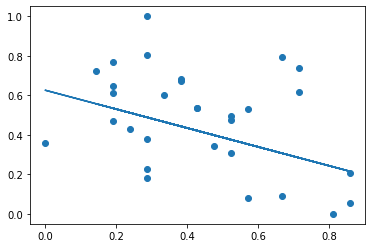

In [65]:
plt.plot(data_train_x,pred2)
plt.scatter(data_train_x,data_train_y)

## Error Rate Analysis

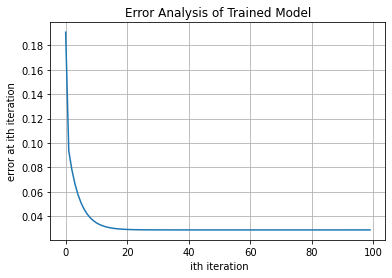

In [66]:
iters = np.arange(epochs)
plt.plot(iters,error)
plt.title("Error Analysis of Trained Model")
plt.xlabel(" ith iteration")
plt.ylabel("error at ith iteration")
plt.grid()

## Mean Square Error Of `Testing Data`

In [67]:
data_test_pred = m*data_test['X'] + c
mse2 = mean_squared_error(data_test['Y'],data_test_pred)
mse2

0.06631511646548924

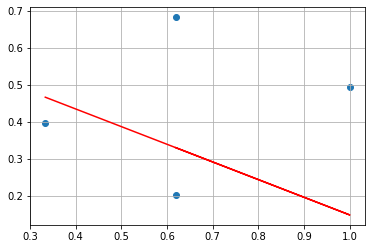

In [68]:
plt.scatter(data_test['X'],data_test['Y'])
plt.plot(data_test['X'],data_test_pred,'red')
plt.grid()

## Predicting Number of **`Bicarbonates`** in the well water by giving **`pH`** as input

In [69]:
# storing max and min values
min_x = data['X'].min()
max_x = data['X'].max()
min_y = data['Y'].min()
max_y = data['Y'].max()



In [70]:
input_x = float(input("enter the pH of well water:"))
input_xx = input_x
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = output_y*(max_y - min_y) + min_y
print("Total number of bicarbonates in well water having pH =",input_xx,"is",output_y)

enter the pH of well water:4.6
Total number of bicarbonates in well water having pH = 4.6 is 285.54323318591725
